In [3]:
import numpy as np
import pandas as pd
from io import StringIO
csv= '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv))

In [4]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [5]:
# return count of null values per column
print(df.isnull().sum())

# return count of null values per row
print(df.isnull().sum(axis=1))

A    0
B    0
C    1
D    1
dtype: int64
0    0
1    1
2    1
dtype: int64


In [6]:
# remove whole rows with null values
print(df.dropna())

# remove whole columns with null values
print(df.dropna(axis=1))

# only drop rows where all columns are NaN
df.dropna(how='all')
    
# remove whole rows where column C is null
df.dropna(subset=['C'])

     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B
0  1.0   2.0
1  5.0   6.0
2  0.0  11.0


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [35]:
# filling in missing data with means
csv = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv))

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # take mean of col
imr = imr.fit(df)
imputed_data = imr.transform(df)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [36]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
], columns = ['color', 'size', 'price', 'class'])
df

,color,size,price,class
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [37]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1
}
inv_size_mapping = {v: k for k, v in size_mapping.items()} # reverse keys and values
df['size'] = df['size'].map(size_mapping)
df
#df['size'] = df['size'].map(inv_size_mapping)
#df

,color,size,price,class
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [38]:
# auto generate map to assign each unique class an integer
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['class']))}
inv_class_mapping = { v: k for k, v in class_mapping.items()}
df['class'] = df['class'].map(class_mapping)
df
#df['class'] = df['class'].map(inv_class_mapping)
#df

,color,size,price,class
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [39]:
# using sklearn for same purpose
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
print(y)       
#y = class_le.inverse_transform(y)
#print(y)

[0 1 0]


In [45]:
# since color are nominal not ordinal, it would not be ideal to transform them directly to an integer index

# 1. first transform color names to integers
# color_le = LabelEncoder()
# df['color_i'] = class_le.fit_transform(df['color'].values)

# 2. apply onehot encoding to split each color into its own column

# new syntax: no need to convert string to integers first
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto') # apply on first column
X = df[['color','size','price']].values
dense_matrix = ohe.fit_transform(X)
dense_matrix.toarray()

array([[0., 1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [46]:
# same purpose done though pd dummies
# note: with this, colors do NOT need to be transformed into int beforehand
df.drop('color_i', axis=1, inplace=True)
pd.get_dummies(df[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [47]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None,
    names=['Class label',
          'Alcohol',
          'Malic acid', 
          'Ash',
          'Alcalinity of ash', 
          'Magnesium',
          'Total phenols', 
          'Flavanoids',
          'Nonflavanoid phenols',
          'Proanthocyanins',
          'Color intensity', 
          'Hue',
          'OD280/OD315 of diluted wines',
          'Proline'])
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
# same as ch3
# split into train test dataset
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# feature scaling
# Normalization: diff to min/range
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test) # again, scale test with train's scale

# Standardiztion: Z score
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [50]:
# L2 regulatiztion: sum of squares of weights
# L1 regulatization: sum of weights (stronger regularization)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [51]:
# y intercept when X is all 0; representative of the reg bias
lr.intercept_

array([-0.38379732, -0.15808776, -0.70042814])

In [52]:
# weight coef for class 0, 1 & 2 resp.
lr.coef_

array([[ 0.28021845,  0.        ,  0.        , -0.02798459,  0.        ,
         0.        ,  0.71014635,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23614327],
       [-0.64397916, -0.06877072, -0.05719699,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9268269 ,
         0.06016552,  0.        , -0.37099411],
       [ 0.        ,  0.06155554,  0.        ,  0.        ,  0.        ,
         0.        , -0.63551857,  0.        ,  0.        ,  0.49785069,
        -0.35823402, -0.57187708,  0.        ]])

In [53]:
# feature selection
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.estimator    = clone(estimator)
        self.k_features   = k_features # num of features to reduce to
        self.scoring      = scoring
        self.test_size    = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1] # num of features to be included in each subset
        self.indices = tuple(range(dim)) # indices of features finally included after procedure, start with all
        self.best_scores = []
        self.subsets = []
        
        while dim >= self.k_features:
            scores_map = {}
            
            for p in combinations(self.indices, r=dim):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores_map[p] = score
                
            best_score = max(list(scores_map.values()))
            self.best_scores.append(best_score)
            self.indices = [k for k,v in scores_map.items() if v == best_score][0] # replace indices with the indices that return the highest score
            self.subsets.append(self.indices)
            dim -= 1
        
        self.k_score = self.best_scores[-1]# final score when k features are used
        
        return self
            
    
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        X_train = X_train[:,indices]
        X_test = X_test[:, indices]
        
        self.estimator.fit(X_train, y_train)
        y_pred = self.estimator.predict(X_test)
        return self.scoring(y_test, y_pred)
    
    # after fitting, apply result to X
    def transform(self, X):
        return X[:, self.indices]
    

In [54]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

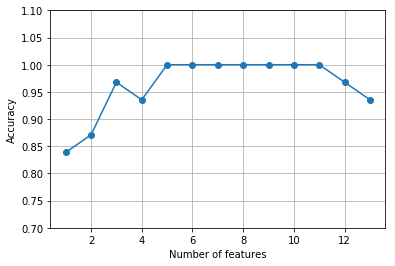

In [55]:
n_features = [len(features) for features in sbs.subsets]
plt.plot(n_features, sbs.best_scores, marker = 'o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [56]:
# features that are used when k = 5
k5 = list(sbs.subsets[8])
print(df_wine.columns[1:][k5])

# features that are used when k = 9
k9 = list(sbs.subsets[4])
print(df_wine.columns[1:][k9])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')
Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Hue', 'Proline'],
      dtype='object')


In [57]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

X_train_std_subset = X_train_std[:, k5]
X_test_std_subset = X_test_std[:, k5]

knn.fit(X_train_std_subset, y_train)
print('Training accuracy:', knn.score(X_train_std_subset, y_train))
print('Test accuracy:', knn.score(X_test_std_subset, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444
Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


In [58]:
# feature importance by decision forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

 1) Alcohol                        0.106589
 2) Malic acid                     0.025400
 3) Ash                            0.013916
 4) Alcalinity of ash              0.032033
 5) Magnesium                      0.022078
 6) Total phenols                  0.060718
 7) Flavanoids                     0.150948
 8) Nonflavanoid phenols           0.014645
 9) Proanthocyanins                0.022351
10) Color intensity                0.182483
11) Hue                            0.078243
12) OD280/OD315 of diluted wines   0.131987
13) Proline                        0.158610


([<matplotlib.axis.XTick at 0x1a26a3f0f0>,
 <a list of 13 Text xticklabel objects>)

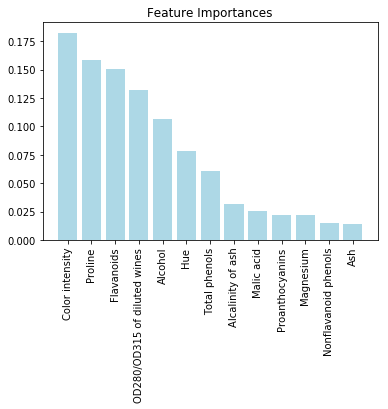

In [59]:
feat_labels = df_wine.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # indices of features in asc importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[f]))
    
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue',align='center')
plt.title('Feature Importances')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.show()